# Probability Distributions

(EXERCISES TOWARD THE BOTTOM) 

Probability distributions are mathematical functions that we can use to model real-world processes. These distributions provide the probabilities of occurrence of different possible outcomes in an experiment.

In this lesson we will discuss four of the most common distributions: uniform, normal, binomial, and poisson. We will also discuss how to work with these distributions with python and scipy.

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

np.random.seed(123)

### Types of Distributions

- _Uniform distributions_ have equal likelihoods amont all outcomes, like a fair coin.
- _Binomial distributions_ are all about determining a binary outcome of an event. Success/failure, for example
- _Normal distributions_ model a continuous random variable.
- Poisson distributions show certain amount of events occuring over a time interval    

There are many more distribution shapes. This lesson will focus on the first four.

### Working With Distribution Objects from scipy.stats

1. Consider the situation at hand and determine the appropriate distribution type.
2. Create the distribution object using the stats module from scipy.
3. Ask yourself what information you have and what information you need.
4. Utilize the diagram below to call the appropriate distribution. Hey Python, you do the calculus!
5. Because these distribution objects represent the distribution itself and not specific numbers, use the rvs method if you need to generate actual random numbers (for visualizing or using to produce simulation experiments)

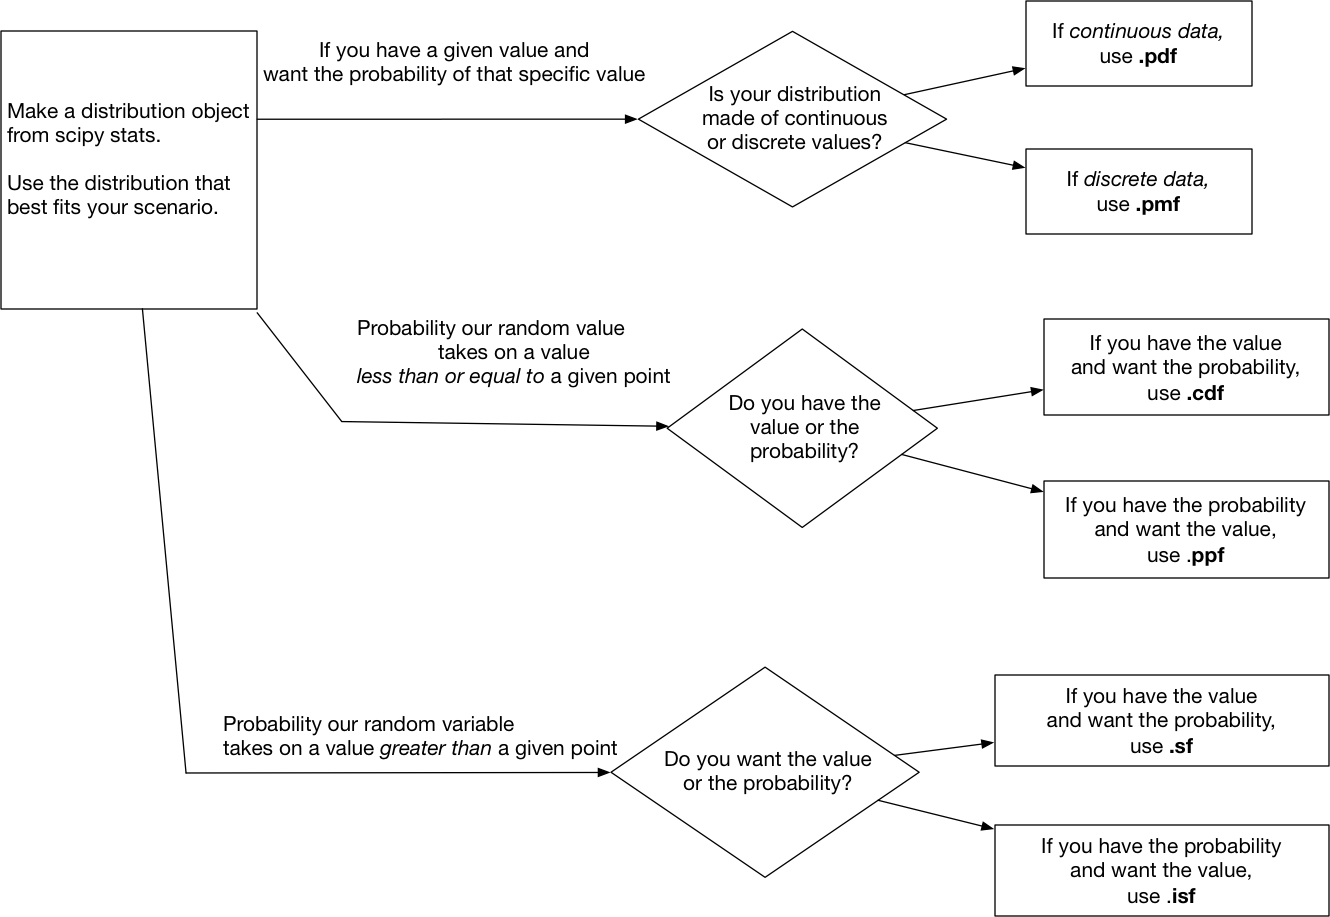

### Uniform Distribution

The uniform distribution can be used to model events where the outcome is discrete and each outcome has an equally likely chance of happening.

An example of an event that can be modeled with the uniform distribution is the outcome of rolling a 6-sided die.

Since the uniform distribution is conceptually simple, we will use it as an example of how to work with different distributions in scipy.

### Working with distributions in SciPy

Scipy provides many different ways of interacting with various statistical distributions through it's stats module.

We will discuss the following distribution methods:

- rvs RANDOM VALUES 
- pmf / pdf PROBABILITY MASS FUNCTION ; PROBABILITY DENSISTY FUNCTION (for continuous distributions)
- cdf / ppf CUMULATIVE DENSIT FUNCTIONS; PERCNT POINT FUNCTION (aka the quantile function)
- sf / isf SURVIVAL FUNCTION; INVERSE SURVIVAL FUNCTION

Before using any of the above methods, a distribution must be created, and any parameters that define that distribution must be defined (we'll see more examples of this as we discuss other types of distributions). To represent rolling a dice, we'll use the randint distribution and specify that the outcomes are from 1 - 6


die_distribution = stats.randint(1, 7)

While our example here is fairly simple, and the values we are calculating could easily be calculated by hand, the same principles that we get into here will apply to all the distributions we talk about where the calculations are not so easy.

Now that we have created the distribution object, we will explore some different ways to use it.

### Random Values

We can generate random values based on the distribution with the rvs method. We can pass

no arguments to get a single random value
a single integer to get that many random values
a tuple with the dimensions of a matrix of random values

### The probability mass function (pmf) (probability density function (pdf) for continuous distributions)
is a function that gives us the probability of any single outcome. For example, we could use the pmf to give us the probability of rolling a 3 with our dice rolling distribution:

### The cumulative density function
tells us the likelihood of a single outcome or all the results below it. For our dice rolling example, this might be something like "what is the probability of rolling a 3 or lower?"

### The percent point function (ppf) (also known as the quantile function) 
can be thought of as the inverse of the cdf. The ppf accepts a probability, and gives us the value that is associate with that probability:

SF / ISF

### The survival function (sf)
tells us what the probability of our random variable falling above a certain value is. This is the same as 1 minus the cdf of the same value. We can use this to answer questions like: "What is the likelihood we roll a value higher than 4?"

### Binomial Distribution

The binomial distribution lets us model the number of successes after a number of trials, given a certain probability of success. The classic example of this is the number of heads you would expect to see after flipping a coin a certain number of times.

A binomial distribution is defined by a number of trials, and a probability of success. These two pieces of information are what we need in order to model a problem with the binomial distribution.

The binomial distribution assumes that each trial is independent of the others.

### Normal Distribution

The normal distribution models a continuous random variable where the further away from the mean you are, the less likely the outcome. This is commonly referred to as the "bell curve", and many continous variables tend to follow a normal distribution.

A normal distribution is defined by a mean and a standard deviation. The __standard normal distribution__ is a normal distribution with a mean of 0 and standard deviation of 1.

### Poisson Distribution

The poisson distribution lets us model a situation where a certain number of events happen over a specified time interval1. The number of events that happen is a discrete measure, and this distribution can tell us the likelihood of a certain number of events occuring over the time period.

The poisson distribution assumes that the events are indpendent of each other and independent of the time since the last event. We must also know the average rate to use a poisson distribution.

Some examples of real-world processes that can be modeled with a poisson distribution are:

- The number of emails sent by a mail server in a day
- The number of phone calls received by a call center per hour
- The number of decay events per second from a radioactive source




For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

# 1.)
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?

The probability that no cars drive up in the noon hour is 0.1353352832366127


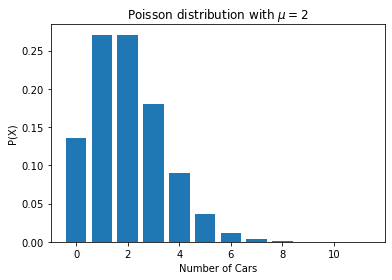

In [112]:
μ = 2

x = np.arange(0,12)
y = stats.poisson(μ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $μ = 2$')
plt.xlabel('Number of Cars')
plt.ylabel('P(X)');

print(f'The probability that no cars drive up in the noon hour is {stats.poisson(μ).pmf(0)}')

- What is the probability that 3 or more cars come through the drive through?

In [7]:
stats.poisson(μ).sf(2)

0.32332358381693654

- How likely is it that the drive through gets at least 1 car?

In [8]:
stats.poisson(μ).sf(0)

0.8646647167633873

### Simulations for Number One

In [122]:
cars = np.random.poisson(μ, size = 10_000)
df = pd.DataFrame(cars)
no_cars = df.apply(lambda row: row.values.sum() == 0, axis=1).mean()
print(f' The probabilty that no cars arrive at noon is {no_cars}')

at_least_three_cars = df.apply(lambda row: row.values.sum() >= 3, axis=1).mean()
print(f' The probabilty that at least one car arrives at noon is {at_least_three_cars}')

one_or_more_cars = df.apply(lambda row: row.values.sum() >= 1, axis=1).mean()
one_or_more_cars
print(f' The probabilty that at least one car arrives at noon is {one_or_more_cars}')



 The probabilty that no cars arrive at noon is 0.1292
 The probabilty that at least one car arrives at noon is 0.3307
 The probabilty that at least one car arrives at noon is 0.8708


# 2.) 
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?

In [24]:
μ = 3.0
σ = .3

the_norm = stats.norm(μ, σ)
the_norm.isf(.05)

print(f'If you want to be in the top 5% of the class, you need at a GPA of at least {round(the_norm.isf(.05), 2)}')

If you want to be in the top 5% of the class, you need at a GPA of at least 3.49


- What GPA constitutes the bottom 15% of the class?

In [26]:
the_norm.ppf(.15)
print(f'If you want to be in the bottom 15% of the class, aim lower than {round(the_norm.ppf(.15), 2)}')

If you want to be in the bottom 15% of the class, aim lower than 2.69


- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [37]:
# a decile is one of ten equal groups. So the third decile would be the bottom 20-30% of this class. 

#just noticed I can add multiple probabilities here, as long as I set them within brackets. 

the_norm.ppf([.2, .3])
# array([2.74751363, 2.84267985])

print(f'Students in the GPA range of {round(the_norm.ppf(.2), 2)}-{round(the_norm.ppf(.3), 2)} qualify fo this scholarship.')
print(f'Yes, a student with a 2.8 GPA would qualify, as long as it is not a 2.85 or greater.')

Students in the GPA range of 2.75-2.84 qualify fo this scholarship.
Yes, a student with a 2.8 GPA would qualify, as long as it is not a 2.85 or greater.


- If I have a GPA of 3.5, what percentile am I in?

In [41]:
the_norm.cdf(3.5)
print(f'Students with a GPA of 3.5 are in the {round(the_norm.cdf(3.5), 2)}th percentile.')
print(f'Only {round(the_norm.sf(3.5), 2)} percent of students perform higher')

Students with a GPA of 3.5 are in the 0.95th percentile.
Only 0.05 percent of students perform higher


### SIMULATIONS FOR NUMBER TWO

In [88]:
# simulations for each 

# GPA for Top 5%

print(f'    GPA for Top 5% is {round(np.percentile(np.random.normal(3, 0.3, 100_000), 95), 2)}')

# GPA for Bottom 15%

print(f'  GPA for Bottom 15% is {round(np.percentile(np.random.normal(3, 0.3, 100_000), 15), 2)}')

# 3rd decile GPA range 
print(f'{np.percentile(np.random.normal(3, 0.3, 100_000), [20, 30])} indicates the range of the 3rd decile')

# Percentile for 3.5 GPA
print(f'  Students with a GPA of 3.5 are in the {round((np.random.normal(3, 0.3, 100_000) < 3.5).mean(), 2)}th percentile.')

# ProTip: when generating random numbers, p is not a part of the generator for normal distribution. 





    GPA for Top 5% is 3.49
  GPA for Bottom 15% is 2.69
[2.74588618 2.84020883] indicates the range of the 3rd decile
  Students with a GPA of 3.5 are in the 0.95th percentile.


# 3.)
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [48]:
# This is a case of binomial distribution. 
# Binomial distributions are all about determining a binary outcome of an event. Success/failure, for example

n = 4326
p = 0.02

# Survival Function works through exclusivity. The value just above the number used in the argument is the start-point.
# So, since I want to know the likelihood that 97 or more have clicked, then I will need to type in 96. 

stats.binom(n, p).sf(96)
print(f'The likelihood of this many clickers is fairly low, at just {round(stats.binom(n, p).sf(96) * 100, 2)}%')

The likelihood of this many clickers is fairly low, at just 13.98%


### Simulation for Three

In [123]:
clicks = np.random.choice([0,1], size = (10_000, 4326), p = (0.98, 0.02))

print(f'The likelihood of this many clickers is fairly low, at just {(clicks.sum(axis = 1) >= 97).mean()}')

The likelihood of this many clickers is fairly low, at just 0.1388


# 4.)
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

0.45284335760923855


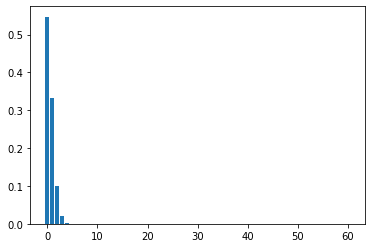

In [155]:
questions = 100
n = 60
p = .01

theoretical_probability = stats.binom(n, p).sf(0)
x = np.arange(n+1)
y = [stats.binom(n, p).pmf(x) for x in x] 

plt.bar(x, y)

print(theoretical_probability)

In [154]:

#Frozen Distributions
#
#Normally, you must provide shape parameters (and, optionally, location and scale parameters to each call of a method of a distribution.
#
#Alternatively, the object may be called (as a function) to fix the shape, location, and scale parameters returning a “frozen” continuous RV object:
#
#rv = generic(<shape(s)>, loc=0, scale=1)
#rv_frozen object with the same methods but holding the given shape, location, and scale fixed


### Simulation for Four

In [156]:
((np.random.choice([0,1], size = (100_000, 60), p = (0.99, 0.01))).sum(axis =1) >0).mean()

0.45108

# 5.) 
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [173]:
p = .03 # likelihood any one student cleans the break area when they visit it
p2 = .9 # on any given day, about 90% of the 3 active cohorts of students visit the break area
n = 3 * 22
cleaners_n = round(p2 * n)
cleaners_n # 59

# how likely is it that the area gets cleaned up each day?

print(f'Likelihood of daily clean-up is {stats.binom(cleaners_n, p).sf(0)}')

# How likely is it that it goes two days without getting cleaned up?

print(f'Likelihood of two days of sheer filth {stats.binom(cleaners_n * 2, p).pmf(0)}')

# Likelihood of not getting cleaned up all week? 

print(f'Likelihood of a full week of sheer filth {stats.binom(cleaners_n * 5, p).pmf(0)}')

Likelihood of daily clean-up is 0.8342199288437352
Likelihood of two days of sheer filth 0.027483031992576134
Likelihood of a full week of sheer filth 0.00012521651388091245


### Simulations for Five

In [204]:
#so_fresh_and_so_clean = np.random.choice([1,0], size = (10_000 * cleaners_n), p = (0.97, 0.03)).reshape(10_000, cleaners_n)
#clean_me_daddy = so_fresh_and_so_clean.sum(axis=1) >= 1
#clean_me_daddy.mean()

so_fresh_and_so_clean = np.random.choice([0, 1], size = (10_000 * cleaners_n), p = (0.97, 0.03)).reshape(10_000, cleaners_n)
clean_me_step_mom_cohort = so_fresh_and_so_clean.sum(axis=1) >= 1
print(clean_me_step_mom_cohort.mean())

so_fresh_and_so_clean = np.random.choice([0, 1], size = (10_000 * (59 * 2)), p = (0.97, 0.03)).reshape(10_000, (59 * 2))
dirty = so_fresh_and_so_clean.sum(axis=1) == 0
print(dirty.mean())

so_fresh_and_so_clean = np.random.choice([0, 1], size = (10_000 * (cleaners_n * 5)), p = (0.97, 0.03)).reshape(10_000, (cleaners_n * 5))
filthy = so_fresh_and_so_clean.sum(axis=1) == 0
print(filthy.mean())

0.8376
0.0262
0.0001


# 6.) 
You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# 7.) 
Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?

- What percent of employees earn more than 95,000?

- What percent of employees earn between 65,000 and 80,000?

- What do the top 5% of employees make?